# **Predictive Modeling with Scikit-Learn**

In [16]:
import pandas as pd

# Dataset Information

The dataset, named "delaney_solubility_with_descriptors.csv," contains information about molecular properties and their corresponding solubility values. Here are the details of the dataset:

### Dataset Structure:
- **Number of Entries:** 1144
- **Number of Columns:** 5

### Columns:
1. **MolLogP:** A numerical descriptor representing the octanol-water partition coefficient (logP) of the molecule.
2. **MolWt:** A numerical descriptor representing the molecular weight of the molecule.
3. **NumRotatableBonds:** A numerical descriptor representing the number of rotatable bonds in the molecule.
4. **AromaticProportion:** A numerical descriptor representing the proportion of aromatic atoms in the molecule.
5. **logS:** The target variable, representing the solubility of the molecule (logS).

### Sample Data:
|   MolLogP |   MolWt |   NumRotatableBonds |   AromaticProportion |   logS |
|-----------|---------|---------------------|----------------------|--------|
|     2.5954 |  167.85 |                   0 |                    0 |  -2.18 |
|     2.3765 |  133.405 |                   0 |                    0 |  -2.00 |
|     2.5938 |  167.85 |                   1 |                    0 |  -1.74 |
|     2.0289 |  133.405 |                   1 |                    0 |  -1.48 |
|     2.9189 |  187.375 |                   1 |                    0 |  -3.04 |

### Summary:
- This dataset is focused on the relationship between molecular descriptors and their solubility.
- It is well-suited for regression tasks, where the goal is to predict the solubility (logS) based on the provided descriptors.
- The data appears to be clean with no missing values in any of the columns.

### Potential Uses:
- Building regression models to predict molecular solubility based on molecular descriptors.
- Analyzing the impact of different molecular properties on solubility.
- Feature engineering to discover more complex relationships between the descriptors and solubility.

# Data Loading

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")

In [20]:
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


# Data Analysis

In [21]:
df.isnull().sum()

MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [23]:
df.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


# Target and Feature Variables

In [27]:
X = df.drop(['logS'], axis = 1) # Feature Variable

In [26]:
y = df['logS'] # Target Variable

In [28]:
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [29]:
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

# Data Split

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Building

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [39]:
y_lr_train_pred

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

In [40]:
y_lr_test_pred

array([-1.53917269, -6.08287944, -5.28375883, -3.27746087, -1.70320929,
       -5.63167711, -1.43239582, -2.74544339, -3.43274443, -3.79048137,
       -1.26884289, -1.54861269, -3.72258406, -3.25962057, -3.76344744,
       -2.13317387, -2.00365994, -4.80828381, -1.43582956, -2.81358533,
       -2.37870232, -1.45080608, -3.71048234, -3.06158669, -1.12854214,
       -1.11007232, -2.45566761, -5.0338893 , -3.29087978, -4.21832264,
       -2.45834377, -3.09200621, -3.89726792, -1.85208473, -2.17761301,
       -6.01542152, -1.06493784, -2.35071265, -1.72034021, -1.45695216,
       -1.85208473, -6.66998091, -1.23899725, -1.46015868, -1.65115215,
       -3.79048137, -4.73551134, -1.09859266, -0.69404611, -1.91048017,
       -3.16121056, -2.34753749, -2.01980335, -2.51436431, -7.04012802,
       -5.27488937, -4.18979204, -2.9647599 , -1.7364388 , -1.64388527,
       -4.60884756, -4.84900677, -0.18955927, -1.73839902, -1.63779456,
       -2.01616982, -1.46391856, -7.64117637, -1.34518182, -2.28

# Data Visualization

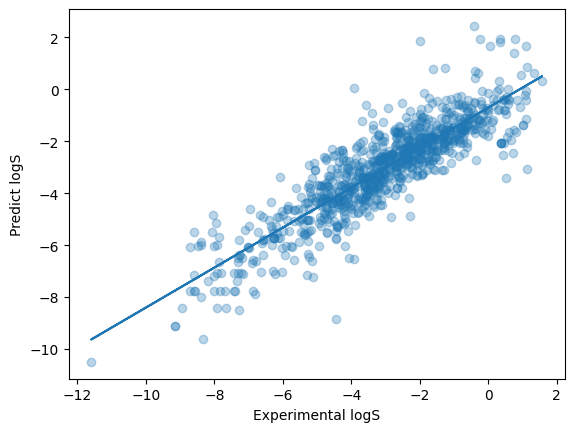

In [45]:
import matplotlib.pyplot as plt
import numpy as np

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.scatter(x = y_train, y = y_lr_train_pred, alpha = 0.3)
plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')
plt.plot(y_train, p(y_train))

# Model Evaluaion

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)

lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [42]:
print('Linear Regression Mean Sqared Error (Train): ', lr_train_mse)
print('Linear Regression Mean Sqared Error (Test): ', lr_test_mse)
print('Linear Regression R2 Score (Train): ', lr_train_r2 )
print('Linear Regression R2 Score (Test): ', lr_test_r2 )

Linear Regression Mean Sqared Error (Train):  1.0139894491573003
Linear Regression Mean Sqared Error (Test):  0.9990844407075306
Linear Regression R2 Score (Train):  0.7695127746587307
Linear Regression R2 Score (Test):  0.7705650058569232


# Conclusion

The MSE values for both training and testing datasets are very close to each other, suggesting that the model is not overfitting. This close match indicates good generalization from the training data to unseen data.
The R² scores for both the training and testing datasets are also very close, indicating that the model explains approximately 77% of the variance in the data for both datasets. This is a reasonably high R² value, implying that the linear regression model is capturing the underlying relationship in the data quite well.